In [1]:
import os
import sys
sys.path.append("../..")
from dataset.mnist import load_mnist
from neuralflow import config
config.GPU = True
# import numpy as np
import matplotlib.pyplot as plt
from neuralflow.model import *
from neuralflow.function_class import *
from neuralflow.function import *
from neuralflow.data import *
from neuralflow.optimizer import *
from neuralflow.trainer import *
from neuralflow.gpu import *
from neuralflow.utils import *
np.random.seed(0)

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist(flatten=False)

In [3]:
x_train[1].shape

(1, 28, 28)

In [4]:
network = Model(
    ConvLayer(input_channel = 1, output_channel = 30, kernel_size = 5, stride = 1, padding=0),
    ReLU(),
    MaxPoolingLayer(kernel_size=2, stride=2),
    DenseLayer(4320, 100),
    ReLU(),
    DenseLayer(100, 10)
)

In [5]:
print(network)

0. ConvLayer1 : ConvLayer (30, 1, 5, 5) 
1. Function1 : Function
2. MaxPoolingLayer1 : MaxPoolingLayer
3. DenseLayer1 : DenseLayer (4320, 100) 
4. Function2 : Function
5. DenseLayer2 : DenseLayer (100, 10) 



In [6]:
epochs = 3
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

In [7]:
iter_per_epoch = max(train_size / batch_size, 1)
critic = CrossEntropyLoss()

In [8]:
train_data = DataLoader(x_train, y_train, batch_size=batch_size)
valid_data = DataLoader(x_test, y_test, batch_size=batch_size)
optim = Adam()

In [9]:
mnist_trainer = ClassificationTrainer(network,
                                    critic,
                                    optim,
                                    epochs,
                                    init_lr = 0.001
                                    )

In [10]:
mnist_trainer.train(train_data, valid_data)

epoch 1


  0%|          | 0/600 [00:00<?, ?it/s]

train loss : 0.1865349529996035    train accuarcy : 94.65547746243739566
epoch 1 -- train loss : 1.054595971086463    train accuarcy : 94.655


  0%|          | 0/100 [00:00<?, ?it/s]

valid loss : 0.06464712600760383    valid accuarcy : 97.0700000000000165
epoch 1 -- valid loss : 0.08437184723796148    valid accuarcy : 97.07000000000001
--------------------------------
epoch 2


  0%|          | 0/600 [00:00<?, ?it/s]

train loss : 0.16889065958657898    train accuarcy : 98.31166666666667364
epoch 2 -- train loss : 0.3371452401980423    train accuarcy : 98.31166666666667


  0%|          | 0/100 [00:00<?, ?it/s]

valid loss : 0.021925352198073608    valid accuarcy : 98.0980808080808359
epoch 2 -- valid loss : 0.05415495024049344    valid accuarcy : 98.09
--------------------------------
epoch 3


  0%|          | 0/600 [00:00<?, ?it/s]

train loss : 0.16107298117014326    train accuarcy : 98.97833333333334556
epoch 3 -- train loss : 0.21169851528465    train accuarcy : 98.97833333333334


  0%|          | 0/100 [00:00<?, ?it/s]

valid loss : 0.015062398125930333    valid accuarcy : 98.5655555555556735
epoch 3 -- valid loss : 0.04257861738360818    valid accuarcy : 98.56
--------------------------------


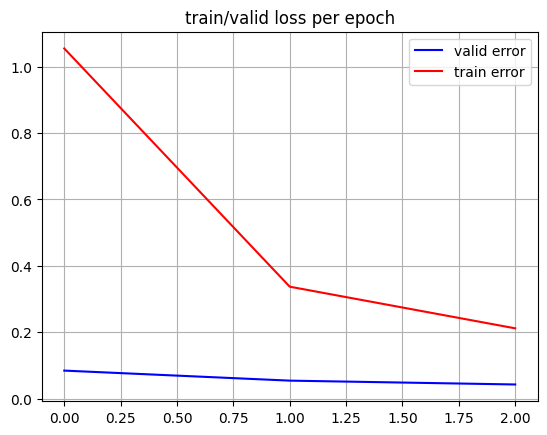

In [11]:
mnist_trainer.show_error_graph(valid = True)

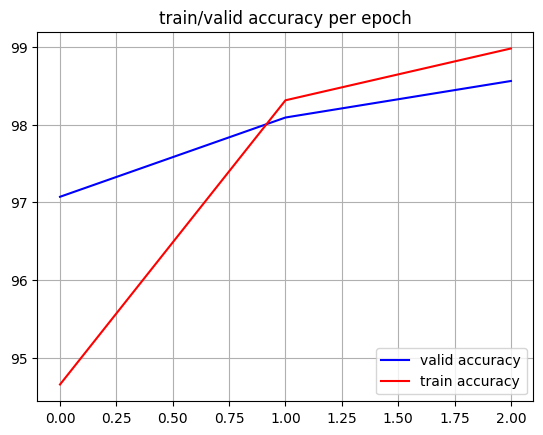

In [12]:
mnist_trainer.show_accuracy_graph(valid = True)